This answer page shows the results of trying different values of `noise` and `n_neighbors` when fitting k-NN to a dummy data set. For you to complete the exercise I would just expect you to maually change the values and rerun the cells to look at the differences. On this page I have done something a little more complicated in order to visualise all the combinations in one plot.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

We'll loop over a range of neighbour counts:

In [2]:
neighbours = [1, 5, 10, 100, 150]

Start by grabbing the data:

In [3]:
data = pd.read_csv("https://milliams.com/courses/applied_data_analysis/moons.csv")
X = data[["x1", "x2"]]
y = data["y"]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

We then loop over the range of values we want, fit the model and plot the result for each.

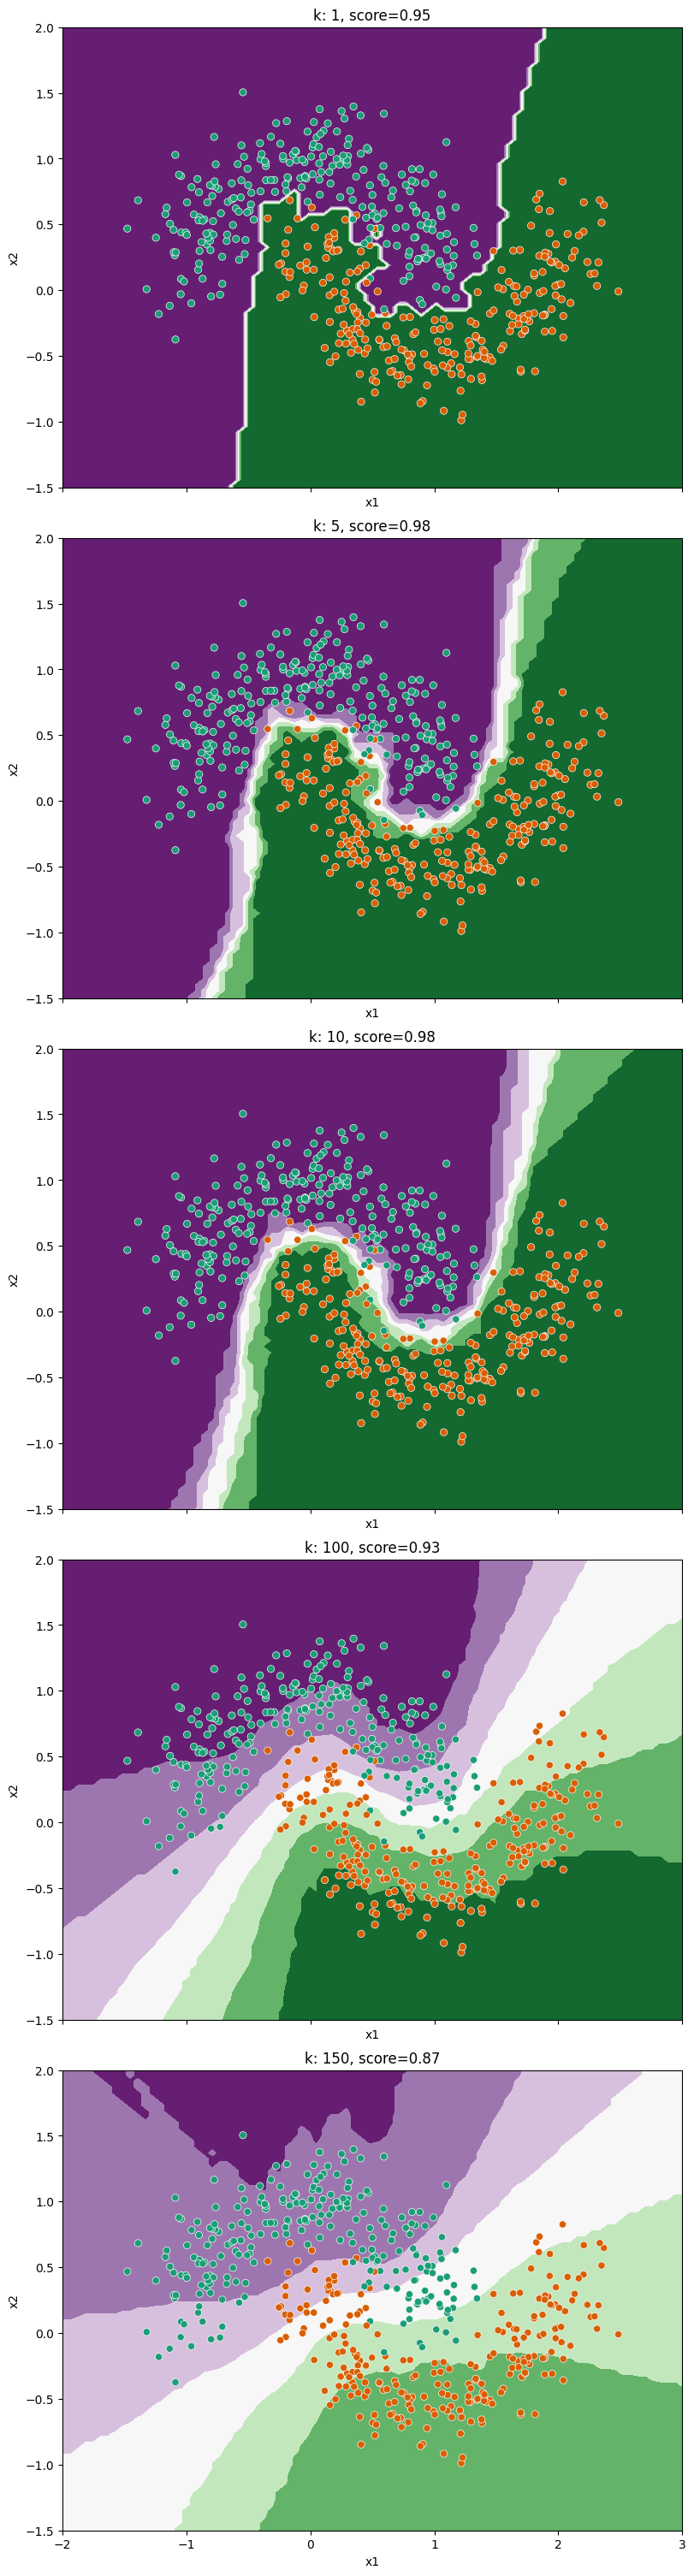

In [4]:
# We'll plot the results in a grid of subplots
fig, axs = plt.subplots(
    nrows=len(neighbours),
    ncols=1,
    figsize=(8, 30),
    constrained_layout=True,
    sharex=True,
    sharey=True
)

for row, n_neighbors in enumerate(neighbours):
    # Fit and score the model (uses the `n_neighbors` variable)
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(train_X, train_y)
    score = model.score(test_X, test_y)

    # Plot the results in the grid of subplots
    ax = axs[row]
    ax.set_xlim(-2, 3)
    ax.set_ylim(-1.5, 2)
    ax.set_title(f"k: {n_neighbors}, score={score:.2}")
    DecisionBoundaryDisplay.from_estimator(model, X, cmap="PRGn", ax=ax)
    sns.scatterplot(data=X, x="x1", y="x2", hue=y, ax=ax, palette="Dark2")
    ax.get_legend().set_visible(False)